In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as sts

The mean of 1 random walk is 4.806451612903226. The variance is 3.18834547346514


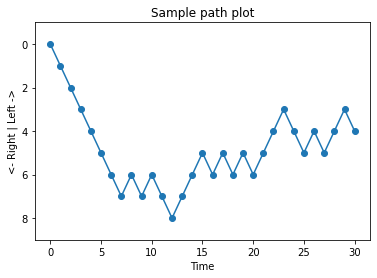

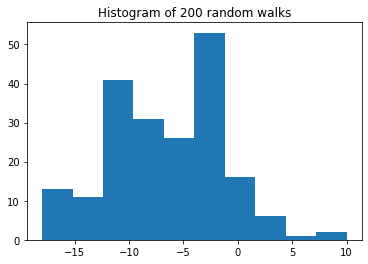

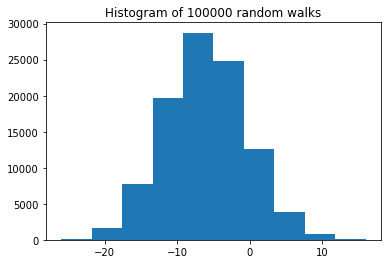

The mean of 100000 random walks is -6.00432. The variance is 28.7515013376
Logically, the mean should be -30*0.6 + 30.04 = -6 (-1 for roughly 60% of 30 steps and + 1 for 40%)


In [48]:
# 1.a)

def random_walk_with_drift():

    time = np.arange(31)
    steps = [0]
    for i in range(1, len(time)):
        if np.random.rand() <= 0.6:
            steps.append(steps[i - 1] - 1)
        else:
            steps.append(steps[i - 1] + 1)
    return time, steps

time, steps = random_walk_with_drift()

print(f'The mean of 1 random walk is {np.mean(steps)}. The variance is {np.var(steps)}')

plt.plot(time, steps, 'C0o')
plt.plot(time, steps, 'C0-')
plt.title('Sample path plot')
plt.xlabel('Time')
plt.ylabel('<- Right | Left ->')
plt.ylim(max(steps) + 1, min(steps) - 1)
plt.show()

# b)

max_steps = []

for i in range(200):
    time, steps = random_walk_with_drift()
    max_steps.append(steps[len(steps) - 1])

plt.hist(max_steps)
plt.title('Histogram of 200 random walks')
plt.show()

max_steps = []

for i in range(100000):
    time, steps = random_walk_with_drift()
    max_steps.append(steps[len(steps) - 1])

plt.hist(max_steps)
plt.title('Histogram of 100000 random walks') # for better results
plt.show()

# c-d)

print(f'The mean of 100000 random walks is {np.mean(max_steps)}. The variance is {np.var(max_steps)}')
print(f'Logically, the mean should be -30*0.6 + 30.04 = -6 (-1 for roughly 60% of 30 steps and + 1 for 40%)')

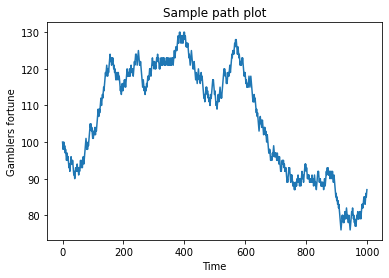

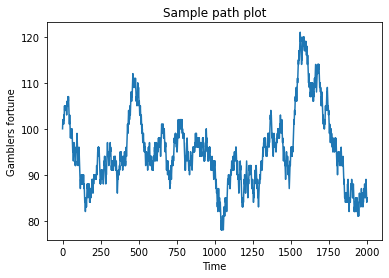

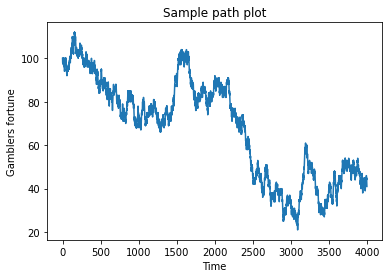

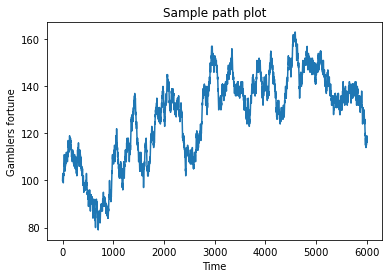

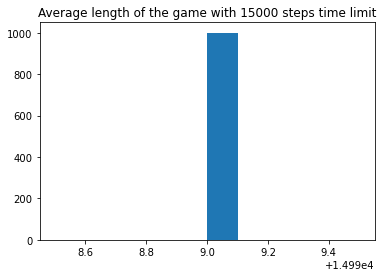

The average length of the game for 1000 trials with 5000 steps time limit is 14999.0. The variance is 0.0
Any value that I have tried for the limit tends to cut the game short and result in 0 variance.


In [65]:
#2.

def gamblers_ruin_with_limit(limit):

    time = np.arange(limit)
    steps = [100]
    gambler = 100
    house = 2000
    for i in range(1, len(time)):
        if gambler == 0 or house == 0:
            break
        if np.random.rand() <= 0.5:
            gambler = gambler + 1
            house = house - 1
        else:
            gambler = gambler - 1
            house = house + 1
        steps.append(gambler)
    return time, steps

for i in [1000, 2000, 4000, 6000]:
    time, steps = gamblers_ruin_with_limit(i)

    plt.plot(time, steps)
    plt.title('Sample path plot')
    plt.xlabel('Time')
    plt.ylabel('Gamblers fortune')
    plt.show()

times = []

for i in range(1000):
    time, steps = gamblers_ruin_with_limit(15000)
    times.append(time[len(time) - 1])

plt.hist(times)
plt.title('Average length of the game with 15000 steps time limit')
plt.show()

print(f'The average length of the game for 1000 trials with 5000 steps time limit is {np.mean(times)}. The variance is {np.var(times)}')
print(f'Any value that I have tried for the limit tends to cut the game short and result in 0 variance.')